### IMPORT LIBRARY

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
import math
import pandas as pd
from scipy.fftpack import fft, fftfreq, ifft

### IMPORT SIGNALS

In [2]:
y = pd.read_csv("C:/Users/ASUS/Documents/GitHub/sound-noise-reduction-signal-processing/ESP32-INMP441-ArduinoIDE/sound_samples_voicenoised.csv")

### PLOT SIGNAL

In [4]:
#create time and sampling frequency
samplingFreq = 10000 # sampled at 10 kHz frequency = 10000 sample/s
tlims = [0,10]       # time duration in second (s)
time = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)

Text(0.5, 0, '$t$ (s)')

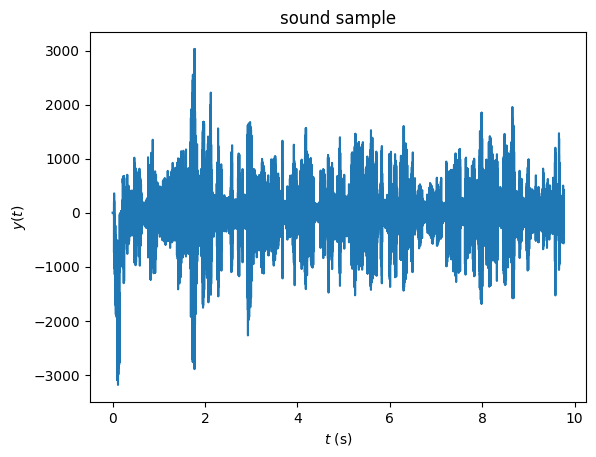

In [5]:
#plot the signal with magnitude and time
plt.plot(time[:len(y)], y)   # didnt use all 10s of time cause of data sampled <100,000 sample (10kHz on 10s)
plt.title("sound sample")
plt.ylabel("$y(t)$")
plt.xlabel("$t$ (s)")

### FFT SIGNAL

In [6]:
# compute spectrum
yhat=fft(y)
fcycles=fftfreq(len(y),1/samplingFreq)

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14120\2424328656.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega$ (cycles/s)")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14120\2424328656.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$|\hat{y}|$")


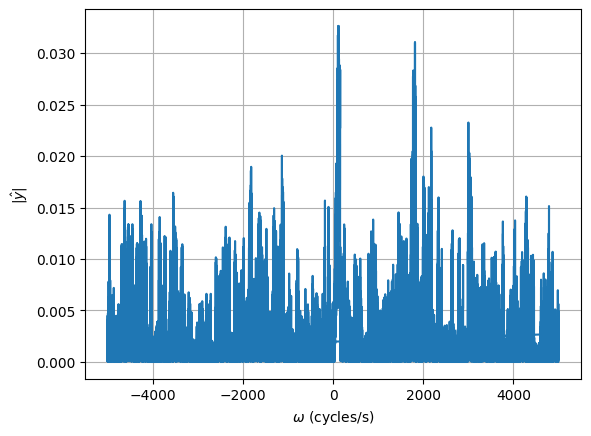

In [7]:
# plot fft result
plt.plot(fcycles,np.absolute(yhat)/len(y))

plt.xlabel("$\omega$ (cycles/s)")
plt.ylabel("$|\hat{y}|$")
plt.grid()

### PLOT SIGNALS AND FFT

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14120\316080866.py:10: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega$ (cycles/s)")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14120\316080866.py:11: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$|\hat{y}|$")


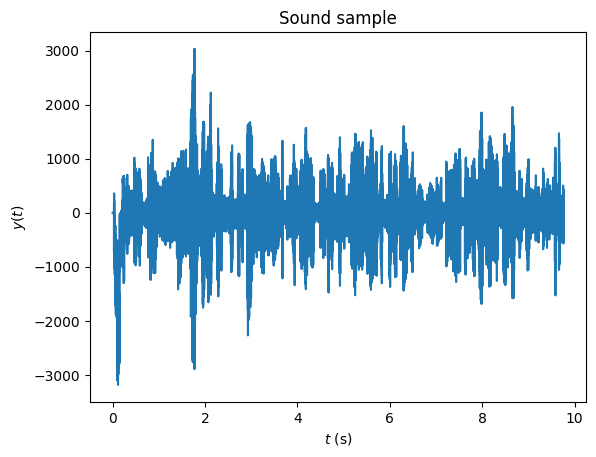

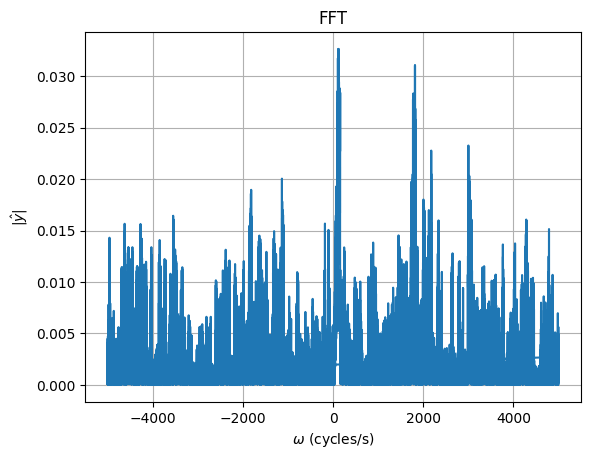

In [16]:
plt.figure()
plt.plot(time[:len(y)], y)
plt.title("Sound sample")
plt.ylabel("$y(t)$")
plt.xlabel("$t$ (s)")

plt.figure()
plt.plot(fcycles,np.absolute(yhat)/len(y))
plt.title("FFT")
plt.xlabel("$\omega$ (cycles/s)")
plt.ylabel("$|\hat{y}|$")
plt.grid()

### FUNGSI ALIH LOWPASS


In [8]:
# Low-pass filter
w0 = 2*np.pi*4900; # frekuensi cut-off (rad/s), frekuensi cut-off dipilih 4900 Hz
num = w0        # koefisien pembilang (numerator) dari fungsi alih
den = [1,w0]    # koefisien penyebut (denominator) dari fungsi alih
lowPass = signal.TransferFunction(num,den) # Generate fungsi alih

# Generate bode plot
# w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), 500 )
# w, mag, phase = signal.bode(lowPass,w)

# # Plotting Magnitude
# plt.figure()
# plt.semilogx(w, mag)
# for sf in signalFreq:
#     plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
# plt.ylabel("Magnitude ($dB$)")
# plt.xlim([min(w),max(w)])
# plt.ylim([min(mag),max(mag)])

# Plotting Fase
# plt.figure()
# plt.semilogx(w, phase)  # Bode phase plot
# plt.ylabel("Phase ($^\circ$)")
# plt.xlabel("$\omega$ (rad/s)")
# plt.xlim([min(w),max(w)])
# plt.show()

In [9]:
lowPass

TransferFunctionContinuous(
array([30787.60800518]),
array([1.0000000e+00, 3.0787608e+04]),
dt: None
)

### FUNGSI ALIH DISKRIT

In [10]:
# Mengubah Fungsi alih analog menjadi Fungsi alih diskrit
dt = 1.0/samplingFreq;
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

TransferFunctionDiscrete(
array([0.60620315, 0.60620315]),
array([1.       , 0.2124063]),
dt: 0.0001
)


### CALCULATE COEFFICIENTS

In [13]:
# Panggil koefisien Filter dari Fungsi alih diskrit sebelumnya (dengan negative sign)
b = discreteLowPass.num
a = -discreteLowPass.den
print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))

Filter coefficients b_i: [0.60620315 0.60620315]
Filter coefficients a_i: [-0.2124063]


In [14]:
# Implementasi Filter Sinyal Menggunakan Persamaan Beda
yfilt = np.zeros(len(y))
for i in range(3,len(y)):
    yfilt[i] = a[1]*yfilt[i-1] + b[0]*y[i] + b[1]*y[i-1]

KeyError: 3

In [ ]:

# Plot Sinyal Input x(n) dan Output terfilter y(n)
plt.figure()
plt.plot(time[:len(y)],y)
plt.plot(time[:len(y)],yfilt)
plt.legend(['input $x(n)$', 'output $y(n)$'], bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.ylabel("$y(t)$")
# plt.xlim([min(t),max(t)])

# Generate Respon Frekuensi (Menggunakan Transformasi Fourier)
yfilthat = np.fft.fft(yfilt)
fcycles = np.fft.fftfreq(len(time),d=1.0/samplingFreq)

plt.figure()
plt.plot(fcycles,np.absolute(yhat))
plt.plot(fcycles,np.absolute(yfilthat))
plt.xlim([-100,100])
plt.xlabel("$\omega$ (cycles/s)")
plt.ylabel("Magnitude $|\hat{y}|$")